<a href="https://colab.research.google.com/github/mayu202020/Stock-Trend-Predictor/blob/main/Stock_Trend_Predictor_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas_datareader.data as web

In [ ]:
dir(pdr)

**Load the data**

In [ ]:
key = "ad55ba1b30b4faddd980f298a21bd730c0fe0bf4"
data = pdr.get_data_tiingo("AAPL", api_key=key)

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
data.to_csv("AAPL.csv")

In [ ]:
df = pd.read_csv("/content/AAPL.csv")
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-01-22 00:00:00+00:00,177.00,177.78,176.60,177.30,26023683,42.022247,42.207430,41.927281,42.093471,104094732,0.0,1.0
1,AAPL,2018-01-23 00:00:00+00:00,177.04,179.44,176.82,177.30,31702531,42.031743,42.601536,41.979512,42.093471,126810124,0.0,1.0
2,AAPL,2018-01-24 00:00:00+00:00,174.22,177.30,173.20,177.25,50562257,41.362236,42.093471,41.120074,42.081600,202249028,0.0,1.0
3,AAPL,2018-01-25 00:00:00+00:00,171.11,174.95,170.53,174.51,39661804,40.623879,41.535548,40.486179,41.431086,158647216,0.0,1.0
4,AAPL,2018-01-26 00:00:00+00:00,171.51,172.00,170.06,172.00,37121805,40.718845,40.835178,40.374595,40.835178,148487220,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-01-12 00:00:00+00:00,133.41,134.26,131.44,133.880,71379648,133.41,134.26,131.44,133.880,71379648,0.0,1.0
1254,AAPL,2023-01-13 00:00:00+00:00,134.76,134.92,131.66,132.030,57809719,134.76,134.92,131.66,132.030,57809719,0.0,1.0
1255,AAPL,2023-01-17 00:00:00+00:00,135.94,137.29,134.13,134.830,63646627,135.94,137.29,134.13,134.830,63646627,0.0,1.0
1256,AAPL,2023-01-18 00:00:00+00:00,135.21,138.61,135.03,136.815,69672800,135.21,138.61,135.03,136.815,69672800,0.0,1.0
1257,AAPL,2023-01-19 00:00:00+00:00,135.27,136.25,133.77,134.080,58280413,135.27,136.25,133.77,134.080,58280413,0.0,1.0


In [ ]:
df.shape

In [ ]:
df.isnull().sum()

**Preprocessing & Visualization**

In [ ]:
df = df.drop(["symbol", "date", "adjClose", "adjHigh", "adjLow", "adjOpen", "adjVolume", "divCash", "splitFactor"], axis=1)
df.head()

,close,high,low,open,volume
0,177.00,177.78,176.60,177.30,26023683
1,177.04,179.44,176.82,177.30,31702531
2,174.22,177.30,173.20,177.25,50562257
3,171.11,174.95,170.53,174.51,39661804
4,171.51,172.00,170.06,172.00,37121805


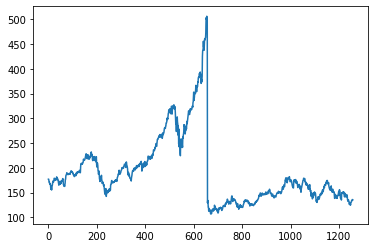

In [ ]:
plt.plot(df.close)

In [ ]:
mov_avg_100d = df.close.rolling(100).mean()
mov_avg_100d 

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1253    145.6380
1254    145.3099
1255    144.9970
1256    144.6738
1257    144.3262
Name: close, Length: 1258, dtype: float64

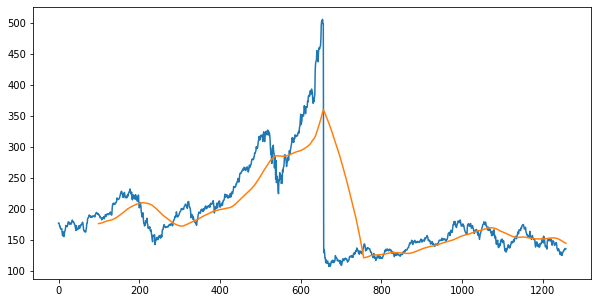

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df.close)
plt.plot(mov_avg_100d)

In [ ]:
mov_avg_200d = df.close.rolling(100).mean()
mov_avg_200d

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1253    145.6380
1254    145.3099
1255    144.9970
1256    144.6738
1257    144.3262
Name: close, Length: 1258, dtype: float64

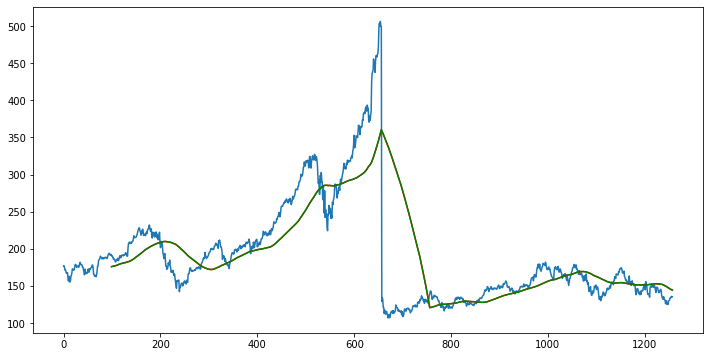

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(mov_avg_100d , 'r')
plt.plot(mov_avg_200d , 'g')

In [ ]:
data_training = pd.DataFrame(df["close"][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df["close"][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(880, 1)
(378, 1)


In [ ]:
data_training.head()

,close
0,177.00
1,177.04
2,174.22
3,171.11
4,171.51


In [ ]:
data_testing.head()

,close
880,145.40
881,146.80
882,148.56
883,148.99
884,146.77


**Scaling the data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

**Train Test Split**

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array [i-100: i])
  y_train.append(data_training_array [i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(780, 100, 1)

**Build & train a model**

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()

model.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
25/25 [==============================] - 21s 590ms/step - loss: 0.0446
Epoch 2/50
25/25 [==============================] - 15s 595ms/step - loss: 0.0184
Epoch 3/50
25/25 [==============================] - 18s 728ms/step - loss: 0.0155
Epoch 4/50
25/25 [==============================] - 15s 590ms/step - loss: 0.0132
Epoch 5/50
25/25 [==============================] - 15s 602ms/step - loss: 0.0135
Epoch 6/50
25/25 [==============================] - 15s 606ms/step - loss: 0.0115
Epoch 7/50
25/25 [==============================] - 15s 606ms/step - loss: 0.0112
Epoch 8/50
25/25 [==============================] - 15s 609ms/step - loss: 0.0106
Epoch 9/50
25/25 [==============================] - 16s 655ms/step - loss: 0.0096
Epoch 10/50
25/25 [==============================] - 15s 615ms/step - loss: 0.0093
Epoch 11/50
25/25 [==============================] - 15s 597ms/step - loss: 0.0087
Epoch 12/50
25/25 [==============================] - 16s 623ms/step - loss: 0.0086
Epoch 13/50
2

**Test & Prediction**

In [ ]:
data_testing.head()

,close
880,145.40
881,146.80
882,148.56
883,148.99
884,146.77


In [ ]:
past_100d = data_training.tail(100)

In [ ]:
final_df = past_100d.append(data_training, ignore_index=True)

In [ ]:
final_df.head()

,close
0,121.26
1,127.79
2,125.12
3,122.06
4,120.13


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.61177207e-02],
       [5.24733876e-02],
       [4.57858485e-02],
       [3.81214778e-02],
       [3.32874139e-02],
       [3.65184721e-02],
       [2.38447088e-02],
       [3.56793989e-02],
       [3.29117095e-02],
       [3.78710081e-02],
       [3.55416406e-02],
       [4.29555416e-02],
       [4.69129618e-02],
       [4.48841578e-02],
       [3.42892924e-02],
       [3.29367564e-02],
       [4.14527239e-02],
       [3.93237320e-02],
       [3.31872260e-02],
       [3.44395742e-02],
       [3.59924859e-02],
       [3.64433312e-02],
       [3.27113338e-02],
       [3.83469004e-02],
       [4.04758923e-02],
       [4.77395116e-02],
       [4.85159674e-02],
       [5.27489042e-02],
       [5.89104571e-02],
       [6.55103319e-02],
       [6.11145899e-02],
       [6.91045711e-02],
       [6.30932999e-02],
       [6.92798998e-02],
       [6.84283031e-02],
       [7.01314966e-02],
       [6.57983719e-02],
       [6.67752035e-02],
       [6.28678773e-02],
       [6.88290545e-02],


In [ ]:
input_data.shape

(980, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data [i-100: i])
  y_test.append(input_data [i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(880, 100, 1)
(880,)


In [ ]:
y_pred = model.predict(x_test)

28/28 [==============================] - 2s 52ms/step


In [ ]:
scaler.scale_

array([0.0025047])

In [ ]:
scale_fact = 1/0.0025047
y_pred = y_pred * scale_fact
y_test = y_test * scale_fact

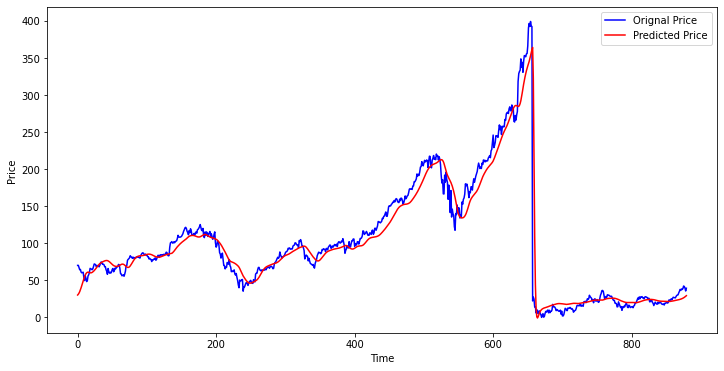

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

**Save a model**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('/content/drive/MyDrive/SPP Model/spp_model.h5')